In [1]:
# 导入数据处理库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 载入数据
data = pd.read_csv('./data/LogiReg_data.txt',header=None,names=['exam1','exam2','admitted'])

In [3]:
data.head(10)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [4]:
data.tail()

,exam1,exam2,admitted
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [5]:
data.shape

(100, 3)

In [6]:
data.size

300

In [7]:
data.columns

Index(['exam1', 'exam2', 'admitted'], dtype='object')

In [8]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2A2139E80>,
      dtype=object)

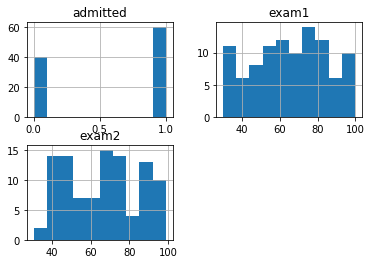

In [9]:
data.hist()

In [10]:
data['admitted'].value_counts()

1    60
0    40
Name: admitted, dtype: int64

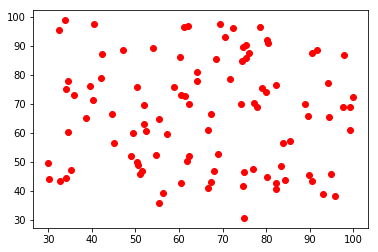

In [11]:
plt.scatter(data['exam1'],data['exam2'],c='r')

In [12]:
positive = data[data['admitted']==1]

In [13]:
negative = data[data['admitted']==0]

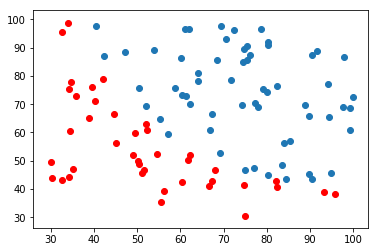

In [14]:
plt.scatter(positive['exam1'],positive['exam2'])
plt.scatter(negative['exam1'],negative['exam2'],c='r')

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
X = data.loc[:,['exam1','exam2']]

In [67]:
y = data['admitted']

In [20]:
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
sita = lr.coef_
sita

array([[0.03844482, 0.03101855]])

In [81]:
b = lr.intercept_
b

array([-3.89977794])

In [54]:
xx = np.array([[49,60],
                  ])

In [55]:
lr.predict_proba(xx)

array([[0.53864011, 0.46135989]])

In [58]:
temp = b + sita.dot(xx.T)
temp

array([[-0.15486925]])

In [59]:
1/(1+np.exp(-temp))

array([[0.46135989]])

可视化-1

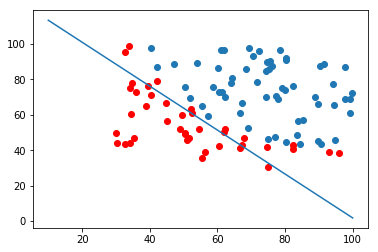

In [88]:
xx1 = np.linspace(10,100,500)
xx2 = (- b - xx1*sita[0,0])/sita[0,1]

plt.scatter(positive['exam1'],positive['exam2'])
plt.scatter(negative['exam1'],negative['exam2'],c='r')

plt.plot(xx1,xx2)

In [62]:
xx.shape

(250, 2)

可视化-2

In [70]:
X.head()
X = X.values

In [72]:
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

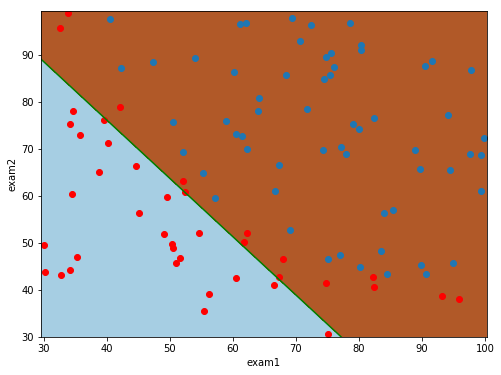

In [87]:
#pcolormesh函数将xx,yy两个网格矩阵和对应的预测结果Z绘制在图片上
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,6))

#调用pcolormesh()函数将xx、yy两个网格矩阵和对应的预测结果Z绘制在图片上，
#可以发现输出为三个颜色区块，分布表示分类的三类区域。
#cmap=plt.cm.Paired表示绘图样式选择Paired主题。输出的区域如下图所示：
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
#绘制散点图
plt.scatter(positive['exam1'],positive['exam2'])
plt.scatter(negative['exam1'],negative['exam2'],c='r')
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 两种可视化方法对比，可见，决策边界是重合的
plt.plot(xx1,xx2,c='g')